# Census Income Project

**Problem Statement:**


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

* A single cell estimate of the population 16+ for each state.

* Controls for Hispanic Origin by age and sex.

* Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset contains 32560 rows and 15 columns.It contains both int and object type data.

In [6]:
# check for missing data (np.nan/blank)
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

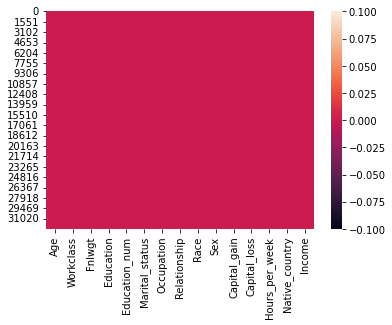

In [7]:
sns.heatmap(df.isna())

There is no null values in the dataset.

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

These are the number of unique values present in each columns.Income holds only 2 values.

In [9]:
for i in df.columns:
        print(df[i].value_counts())
        print('------------------------------------------')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------------------------------------------
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th         

In [10]:
df.isin([" ?"]).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

We can see Workclass,Occupation,Native_country holds "?" value.so,we would drop the respective rows for the dataset.Also, we noticed Capital_gain,Capital_loss has more 0s. These columns are not required for our analysis.Therefore, we would drop them.

In [11]:
# Dropping the columns Capital_gain,Capital_loss
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)
# Dropping Fnlwgt as it is not required for analysis
df.drop("Fnlwgt",axis=1,inplace=True)

In [12]:
df.replace(to_replace=" ?", value=np.nan, inplace= True)
df =df.dropna()
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [13]:
df.isin([" ?"]).sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
df.shape

(30161, 12)

In [15]:
#Lets subset the data as we have big sample
subset=df.sample(frac=0.15)
df=subset
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
24101,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,50,Haiti,<=50K
22260,45,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,40,United-States,<=50K
13293,25,Local-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K
16882,29,Private,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,42,United-States,<=50K
24153,46,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,50,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
10422,59,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
23094,45,Self-emp-not-inc,Some-college,10,Never-married,Sales,Not-in-family,White,Male,55,United-States,<=50K
13296,39,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
9801,40,Private,Some-college,10,Divorced,Craft-repair,Unmarried,Black,Female,30,United-States,<=50K


# Exploratory Data Analysis

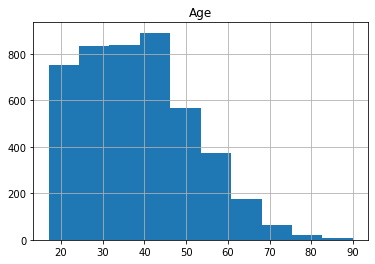

In [16]:
df["Age"].hist(grid=True)
plt.title("Age")
plt.show()

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

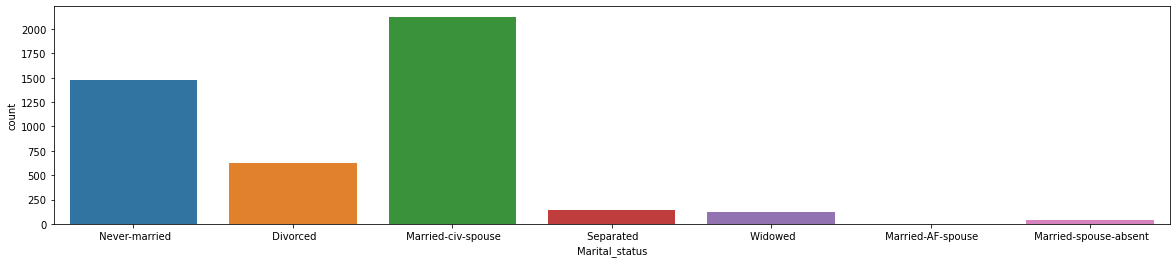

In [17]:
plt.figure(figsize=(20,4))
sns.countplot(df.Marital_status)

<AxesSubplot:xlabel='Sex', ylabel='count'>

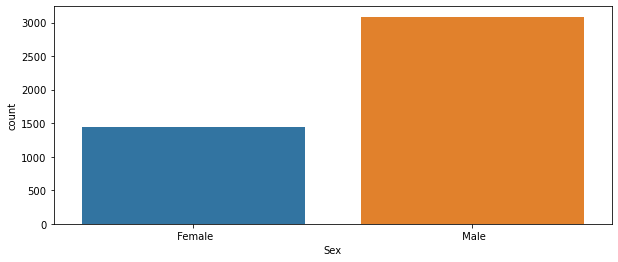

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(df.Sex)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

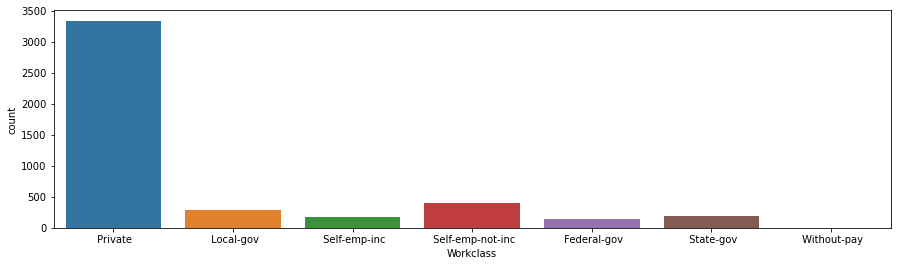

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(df['Workclass'])

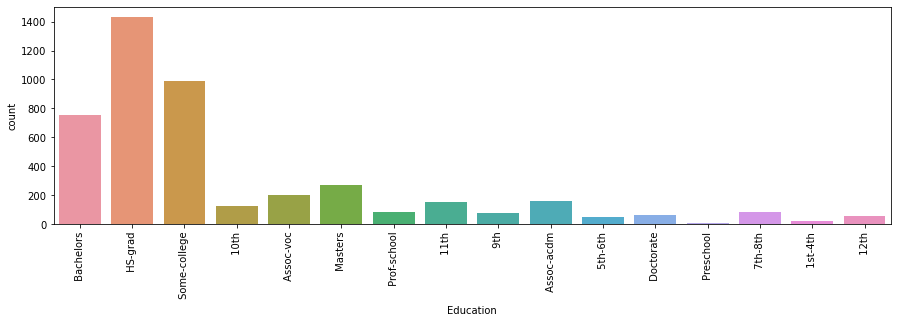

In [20]:
#Count plot for Education
plt.figure(figsize=(15,4))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

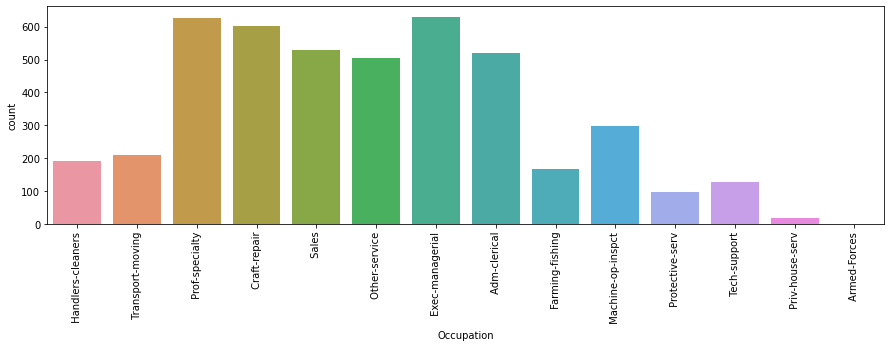

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()

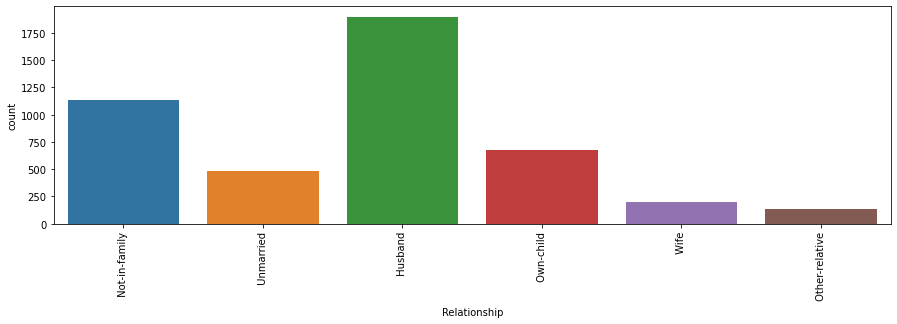

In [22]:
plt.figure(figsize=(15,4))
sns.countplot(df["Relationship"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Race', ylabel='count'>

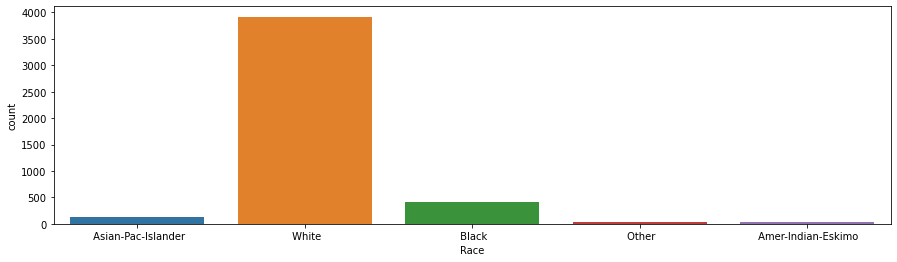

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(df.Race)

<AxesSubplot:xlabel='Income', ylabel='count'>

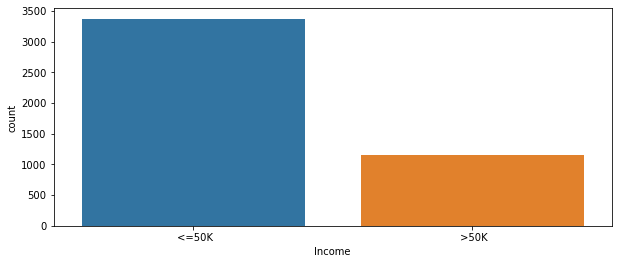

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(df.Income)

From above figures we can observe -
* There are more people from 25-45 age group.
* Most of the people have income <=50K.
* Most of the people working in Private sector which is high compared to others.
* The count of HS-grad is high followed by some college and the count of doctorate is very less compared to others.
* The married people have high counts followed by the Singles or never married people.
* The people who are in the position of Exce-managerial and Prof-specialty have higher count and the people in Priv-house-serv have very least counts.
* In Relationship Husband has more values.
* The count white is more in the dataset.


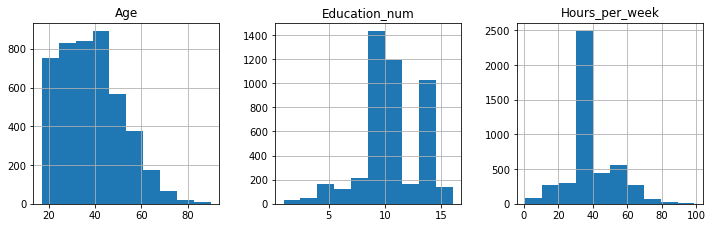

In [25]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

* We can see there are more people from 25-45 age group.
* Mostly people having education for 9-11 followed by 13 years.
* Mostly people work 40 hours per week.

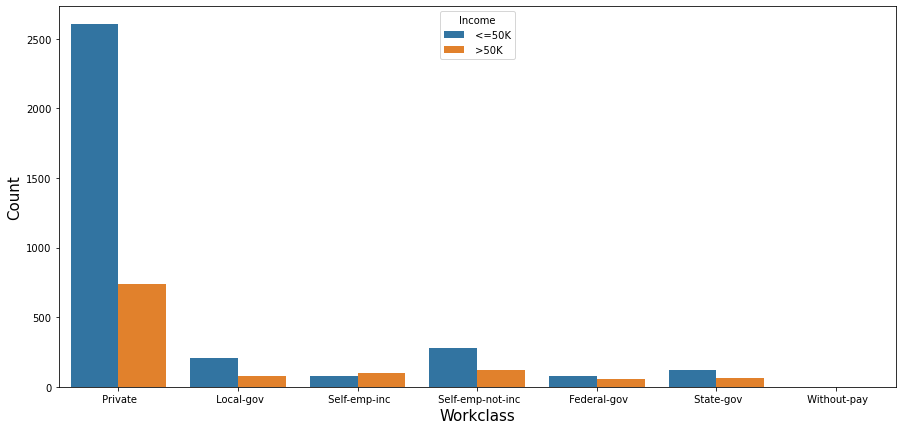

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(df['Workclass'], hue='Income', data= df)
plt.xlabel('Workclass', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

We have maximum no. of population working in Private setor whose income is <=50K.
At same time pepole working in private sector are more as compared to other setcors, whose income is >=50K.

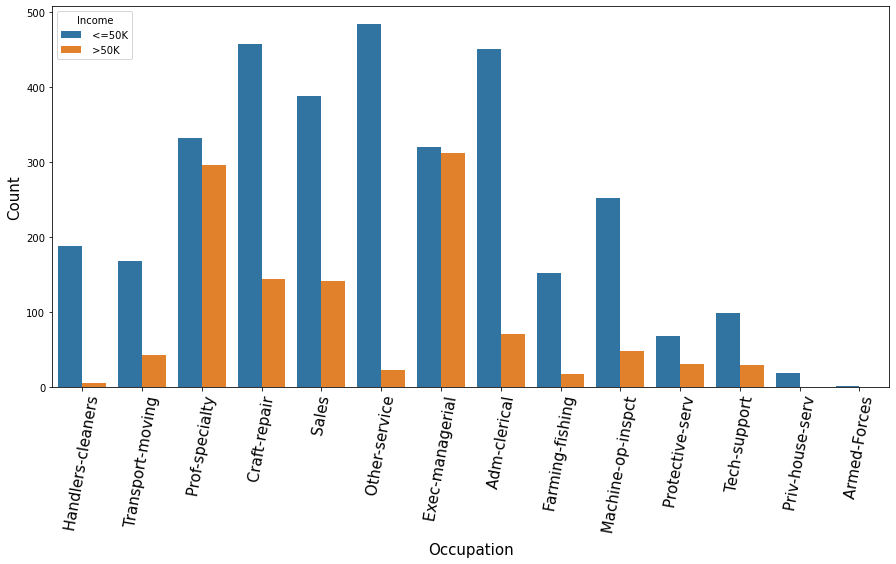

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(df['Occupation'], hue='Income', data= df)
plt.xlabel('Occupation', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Occupation like Exce-managerial and Prof-specialty having higher population with income >=50K.It indicates occupation has good impact on income.

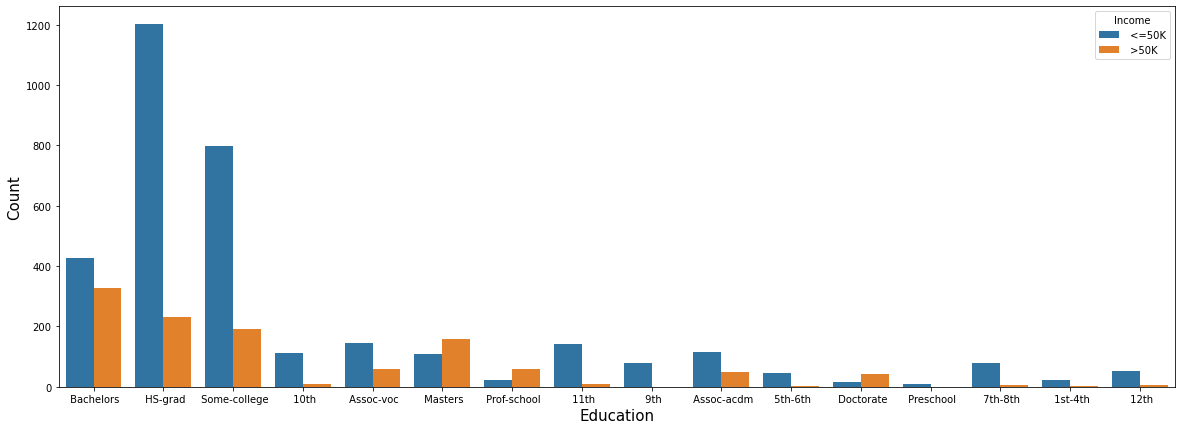

In [28]:
plt.figure(figsize=(20,7))
sns.countplot(df['Education'], hue='Income', data= df)
plt.xlabel('Education', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

The graph indicates that people with higher degree have more chance to have income >=50K.

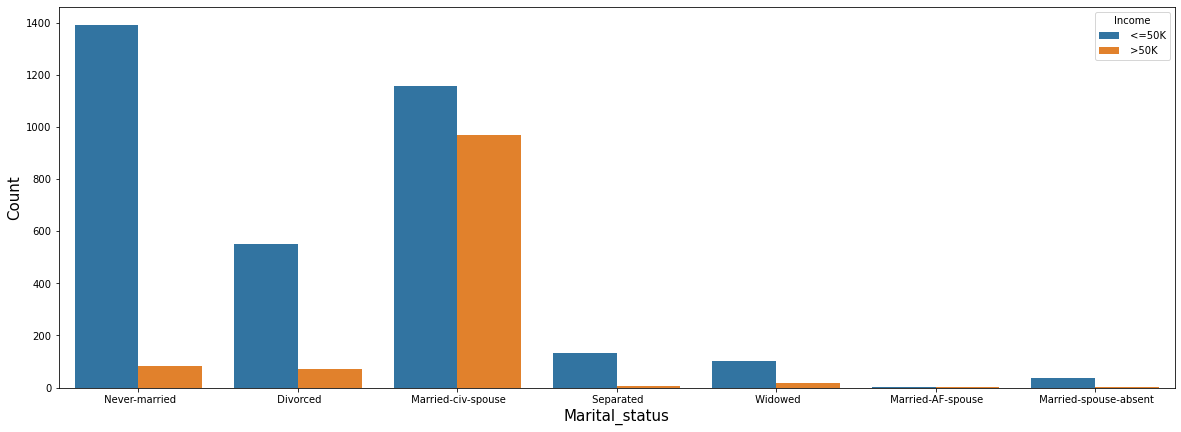

In [29]:
plt.figure(figsize=(20,7))
sns.countplot(df['Marital_status'], hue='Income', data= df)
plt.xlabel('Marital_status', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Married civ spouse population is having higher number of Income which >=50k, as compared to other columns.

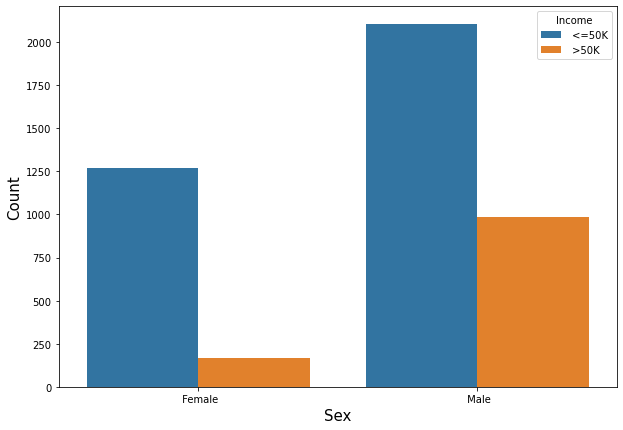

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(df['Sex'], hue='Income', data= df)
plt.xlabel('Sex', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()


We can see Male is having higher count as compared to Female, for income>=50K

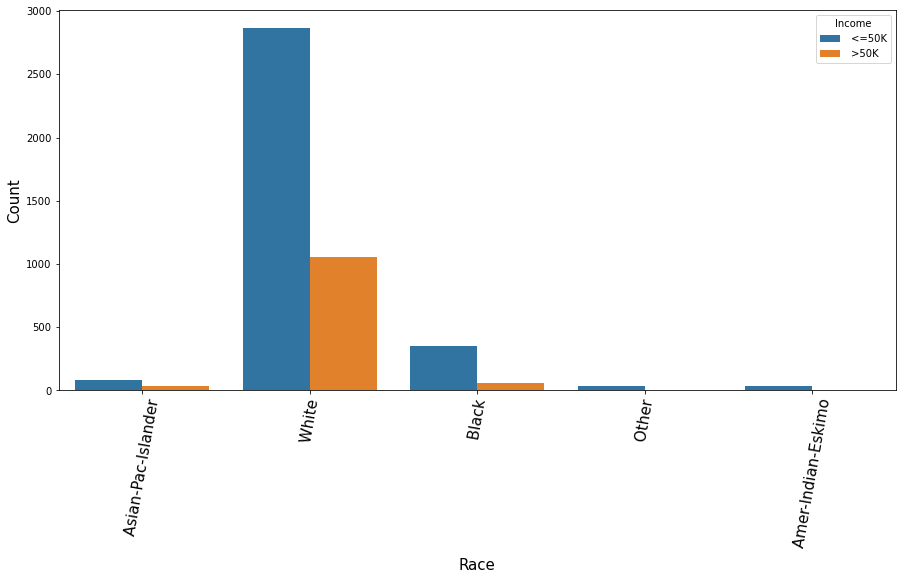

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(df['Race'], hue='Income', data= df)
plt.xlabel('Race', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

As majority of population is White, so the chance of getting income>=50K, Is higher for White.

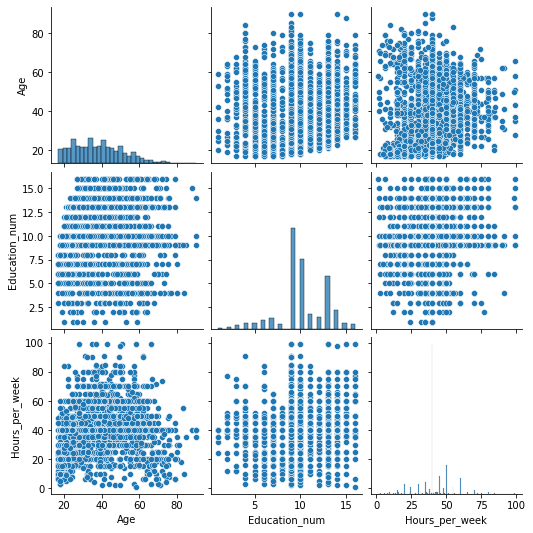

In [34]:
sns.pairplot(df)

# Checking Outliers

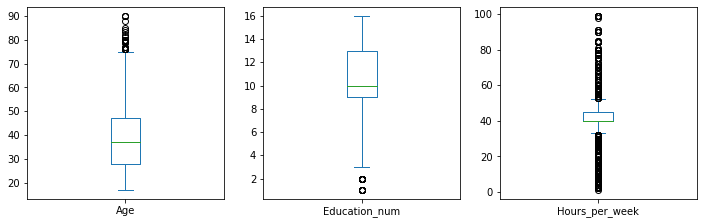

In [37]:
# Identifying the outliers using boxplot

df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

We can see outliers present more or less in all columns.

In [38]:
#Removing outliers
# Features containing outliers
features = df[["Age","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Age,Education_num,Hours_per_week
24101,0.258428,1.100371,0.752998
22260,0.493908,0.442980,0.082927
13293,1.010764,1.100371,0.082927
16882,0.709830,0.442980,0.084258
24153,0.569141,1.100371,0.752998
...,...,...,...
10422,1.547178,1.100371,0.752998
23094,0.493908,0.057142,1.170961
13296,0.042506,0.442980,0.082927
9801,0.117740,0.057142,0.918853


In [39]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
24101,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,50,Haiti,<=50K
22260,45,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,40,United-States,<=50K
13293,25,Local-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K
16882,29,Private,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,42,United-States,<=50K
24153,46,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,50,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
10422,59,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
23094,45,Self-emp-not-inc,Some-college,10,Never-married,Sales,Not-in-family,White,Male,55,United-States,<=50K
13296,39,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
9801,40,Private,Some-college,10,Divorced,Craft-repair,Unmarried,Black,Female,30,United-States,<=50K


In [40]:
# Shape of original dataset
df.shape

(4524, 12)

In [41]:
# Shape of new dataset
df_new.shape

(4408, 12)

In [43]:
# Checking the percentage data loss
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

2.564102564102564

In [45]:
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
24101,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,50,Haiti,<=50K
22260,45,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,40,United-States,<=50K
13293,25,Local-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K
16882,29,Private,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,42,United-States,<=50K
24153,46,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,50,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
10422,59,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
23094,45,Self-emp-not-inc,Some-college,10,Never-married,Sales,Not-in-family,White,Male,55,United-States,<=50K
13296,39,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
9801,40,Private,Some-college,10,Divorced,Craft-repair,Unmarried,Black,Female,30,United-States,<=50K


# Label Encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Education']=le.fit_transform(df_new['Education'])
df_new['Workclass'] = le.fit_transform(df_new['Workclass'])
df_new['Marital_status'] = le.fit_transform(df_new['Marital_status'])
df_new['Occupation'] = le.fit_transform(df_new['Occupation'])
df_new['Relationship'] = le.fit_transform(df_new['Relationship'])
df_new['Race'] = le.fit_transform(df_new['Race'])
df_new['Sex'] = le.fit_transform(df_new['Sex'])
df_new['Native_country'] = le.fit_transform(df_new['Native_country'])
df_new['Income'] = le.fit_transform(df_new['Income']) 

In [48]:
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
24101,35,2,8,13,4,5,1,1,0,50,12,0
22260,45,2,10,9,0,13,1,4,1,40,34,0
13293,25,1,8,13,4,9,1,4,0,40,34,0
16882,29,2,10,9,4,2,4,4,0,42,34,0
24153,46,2,8,13,2,11,0,4,1,50,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10422,59,4,8,13,2,9,0,4,1,50,34,0
23094,45,4,13,10,4,11,1,4,1,55,34,0
13296,39,2,10,9,2,2,0,4,1,40,34,0
9801,40,2,13,10,0,2,4,2,0,30,34,0


In [118]:
## Statistical summary of data
df_new.describe()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,38.159483,2.205989,9.176044,10.202813,2.578040,5.919011,1.415381,3.693512,0.678766,40.720508,32.534029,0.255672
std,12.966268,0.945408,3.319920,2.495682,1.489937,3.969137,1.601313,0.815236,0.467003,10.785337,5.591350,0.436287
min,17.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,28.000000,2.000000,8.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,34.000000,0.000000
50%,37.000000,2.000000,10.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,34.000000,0.000000
75%,47.000000,2.000000,11.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,34.000000,1.000000
max,77.000000,6.000000,13.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,75.000000,36.000000,1.000000


# Skewness

In [49]:
df_new.skew()

Age               0.444894
Workclass         1.146440
Education        -1.069190
Education_num    -0.192131
Marital_status   -0.029549
Occupation        0.120751
Relationship      0.810242
Race             -2.594826
Sex              -0.765934
Hours_per_week   -0.220799
Native_country   -4.175404
Income            1.120543
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

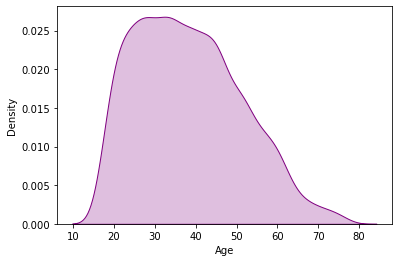

In [50]:
sns.distplot(df_new["Age"],color="purple",kde_kws={"shade": True},hist=False)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

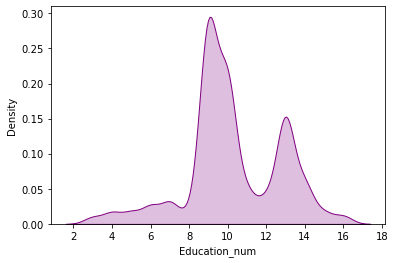

In [51]:
sns.distplot(df_new["Education_num"],color="purple",kde_kws={"shade": True},hist=False)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

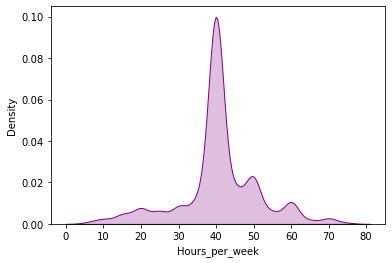

In [52]:
sns.distplot(df_new["Hours_per_week"],color="purple",kde_kws={"shade": True},hist=False)

We can see there is no skewness.

# Correlation

In [53]:
df_new.corr()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.093668,0.017080,0.113397,-0.304003,-0.006442,-0.254637,0.008232,0.060101,0.155323,-0.006042,0.274855
Workclass,0.093668,1.000000,0.014470,0.047494,-0.039122,0.011280,-0.060879,0.042481,0.075900,0.039162,0.012539,0.049429
Education,0.017080,0.014470,1.000000,0.346733,-0.047000,-0.030999,-0.009789,0.002082,-0.047525,0.080285,0.090562,0.070591
Education_num,0.113397,0.047494,0.346733,1.000000,-0.088226,0.101694,-0.119995,0.053534,0.016779,0.187004,0.072144,0.357076
Marital_status,-0.304003,-0.039122,-0.047000,-0.088226,1.000000,0.038998,0.171251,-0.070067,-0.104518,-0.203053,-0.007619,-0.189704
Occupation,-0.006442,0.011280,-0.030999,0.101694,0.038998,1.000000,-0.047044,-0.002413,0.059166,0.004777,-0.016997,0.036726
Relationship,-0.254637,-0.060879,-0.009789,-0.119995,0.171251,-0.047044,1.000000,-0.125988,-0.589210,-0.282442,-0.009347,-0.264101
Race,0.008232,0.042481,0.002082,0.053534,-0.070067,-0.002413,-0.125988,1.000000,0.094773,0.056993,0.111930,0.066612
Sex,0.060101,0.075900,-0.047525,0.016779,-0.104518,0.059166,-0.589210,0.094773,1.000000,0.233104,-0.000332,0.218317
Hours_per_week,0.155323,0.039162,0.080285,0.187004,-0.203053,0.004777,-0.282442,0.056993,0.233104,1.000000,0.011777,0.255627


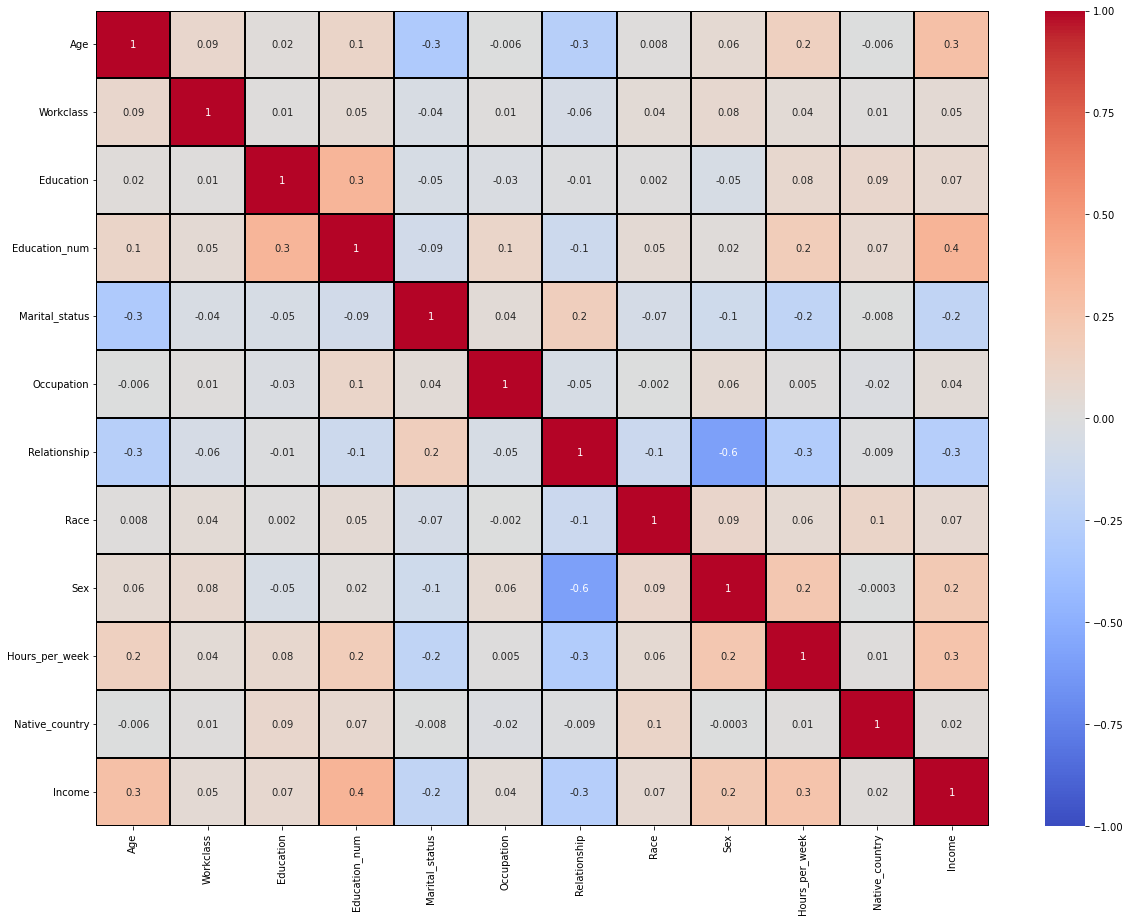

In [54]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue.
Workclass,Native_country, Occupation, Race and Education has less correlation with target.
The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.

As there is no skewness/multicolineraity issue, we can proceed with the model.

# Splitting Of Data

In [56]:
# splitting x and y
x=df_new.drop("Income",axis=1)
y=df_new["Income"]

# Finding Best Random State

In [57]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8197278911564626 on Random_State 10


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [60]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.8197278911564626
[[621  59]
 [100 102]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       680
           1       0.63      0.50      0.56       202

    accuracy                           0.82       882
   macro avg       0.75      0.71      0.72       882
weighted avg       0.81      0.82      0.81       882

Cross Validation Score: 0.795829054285354
Difference Between Accuracy Score and CrossValidation Score: 0.02389883687110861


Accuracy score: of SVC()
0.808390022675737
[[644  36]
 [133  69]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       680
           1       0.66      0.34      0.45       202

    accuracy                           0.81       882
   macro avg       0.74      0.64      0.67       882
weighted avg       0.79      0.81      0.78       882

Cross Validation Score: 0.7878837952131287
Difference Between Accuracy Sc

We can see Random Forest Classifier is performing better than other models.

# Hyper Parameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(8,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [92,95,97,98,100,102,105,107,109],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 105}
0.8289477274072702


In [113]:
rf1=RandomForestClassifier(max_features ='sqrt', max_depth= 10,criterion= 'gini',n_estimators=102)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=102)
0.8310657596371882
[[621  59]
 [ 90 112]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       680
           1       0.65      0.55      0.60       202

    accuracy                           0.83       882
   macro avg       0.76      0.73      0.75       882
weighted avg       0.82      0.83      0.83       882



# ROC AUC

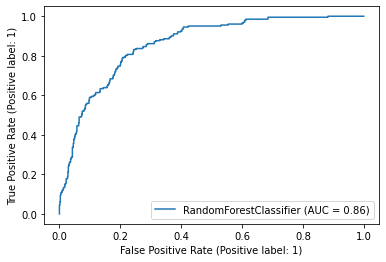

In [114]:

from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf1,x_test,y_test)
#plot_roc_curve(rf1, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix

plt.show()

The score is good, we can save the model.

# Saving The Model

In [115]:
# Saving the model using .pkl
import pickle
filename='Census_Income.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

In [117]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(10)

,original,Predicted
225,0,0
394,0,0
755,0,0
759,1,1
94,0,0
385,1,1
706,0,0
21,0,0
26,0,0
125,0,0
